# Harvard Art Museum Data Analysis Project

Disclaimer: This work includes derogatory language that some people may find profane, vulgar, or offensive. The derogatory terms are used only for the purpose of finding them within museum collections. The inclusion of the offensive language is not meant to promote or condone any discriminatory or harmful beliefs. Reader discretion is advised.

## People
Under Program Director for the Museum Studies program at the Harvard University Extension School, Katherine Burton Jones, in collaboration HAM’s Director of Digital Infrastructure and Emerging Technology, Jeff Steward, Curatorial Assistant at the Harvard University Herbaria ,Madeline Schill, and Harvard Extension School Data Science Graduate Student, Bridget Mullen. 

## Objective
This 2025 spring semester we have been undertaking in a research project initially, focused on unearthing bias or outdated content in HAM’s hidden data fields such as commentary and descriptions. Impressibly, we found almost no evidence of hidden bias or outdated language in these hidden fields. However, we did uncover several issues that require further inquiry, namely:

- A multitude of historically used derogatory terms in forward-facing titles with no forward facing supporting text 

- Object and person culture fields that are largely unorganized and lack a level of specificity needed to represent an artist’s identity, including race, sexual orientation, disability, native culture, and so on. This lack of representation makes it challenging to track the populations represented in museum exhibits and collections, as well as analyze the art from a primary perspective of the artist’s identity.

- A historical underrepresentation of female artists in naming, collecting, and exhibiting their work.


## In the inital analysis we start by identifying some basic properties of the art object records:
Below we can see when objects were made and collected.

In [277]:
# import libraries

import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display, Image, IFrame, HTML
import json
import ast 


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)
import warnings 
  

warnings.filterwarnings('ignore') 

In [321]:
#load to dataframe
df = pd.read_csv('art_objects.csv')
dropped_cols = ['contextualtextcount', 'accesslevel', 'dateoflastpageview', 'totaluniquepageviews', 'markscount',
                'publicationcount', 'totaluniquepageviews', 'contact', 'colorcount', 'rank', 'id', 'state', 
                'verificationleveldescription', 'images','imagecount', 'worktypes', 'imagecount', 'classificationid',
                'standardreferencenumber', 'signed', 'relatedcount', 'verificationlevel', 'titlescount',
                'peoplecount', 'lastupdate', 'periodid', 'edition', 'lendingpermissionlevel', 'colors', 'groupcount',
                'dateoffirstpageview', 'datebegin', 'imagepermissionlevel', 'mediacount', 'techniqueid', 
                'seeAlso', 'details', 'videos', 'audio']

df.drop(dropped_cols, axis = 1, inplace = True)
print(f"The number of years that there was no data on accession year is {df['accessionyear'].isna().sum()}, which is {round(100* df['accessionyear'].isna().sum()/df.shape[0], 2)}% of the records")
df_acession = df[~df['accessionyear'].isna()]
print(f"The first year that Harvard aquired an object in the collection was {int(df_acession['accessionyear'].min())}.")
print(f"The number of years that there is data on created year is {(df['dateend']== 0).sum()}, which is {round(100* (df['dateend']== 0).sum()/df.shape[0], 2)}% of the records. ")
print(f"The oldest object in the collection is from {int(df['dateend'].min())}.")

The number of years that there was no data on accession year is 73996, which is 30.12% of the records
The first year that Harvard aquired an object in the collection was 1765.
The number of years that there is data on created year is 70746, which is 28.8% of the records. 
The oldest object in the collection is from -6995.


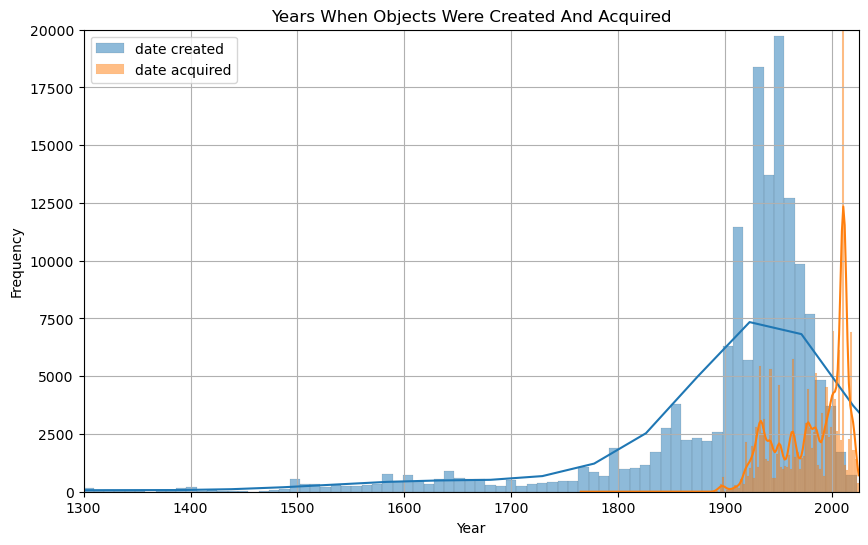

In [134]:
year_df = df[df['dateend']!= 0]
plt.figure(figsize=(10, 6))
sns.histplot(data=year_df, x='dateend', kde=True, label = 'date created', bins = 1000)
sns.histplot(data=df_acession, x='accessionyear', kde=True, label = 'date acquired')
plt.title('Years When Objects Were Created And Acquired')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xlim(1300, 2025)
plt.ylim(0, 20000)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## What divsions are objects from and what kind of objects are they?

3.09 percent of records do not have a division.


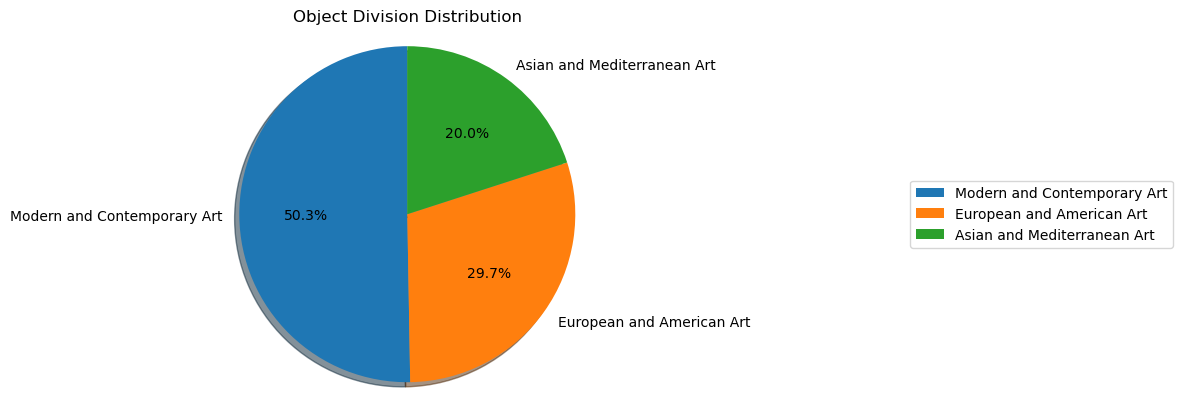

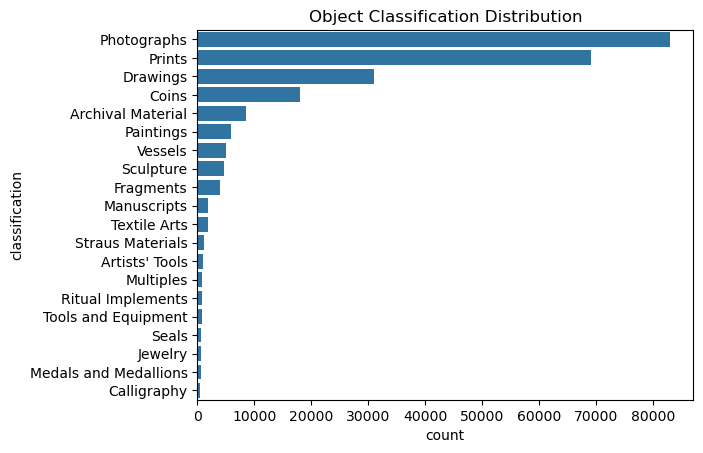

In [136]:
print(f"{round(100* df['division'].isna().sum()/df.shape[0],2)} percent of records do not have a division.")
div_df = df[~df['division'].isna()]
div_df = pd.DataFrame(div_df['division'].value_counts())
div_df.plot.pie(y='count', labels= div_df.index, autopct='%1.1f%%', startangle=90, shadow=True, ylabel='')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Object Division Distribution')

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

class_df = pd.DataFrame(df['classification'].value_counts(dropna= False))
top_class_df = class_df.iloc[0:20]
sns.barplot(x='count', y='classification', data=top_class_df, orient='h')
plt.title('Object Classification Distribution')
plt.show()

## What cultures are objects from?
Here we see that there are numerous, somewhat disorganized culture fields. This is the entry for the object's culture, not necessarily the artist's.

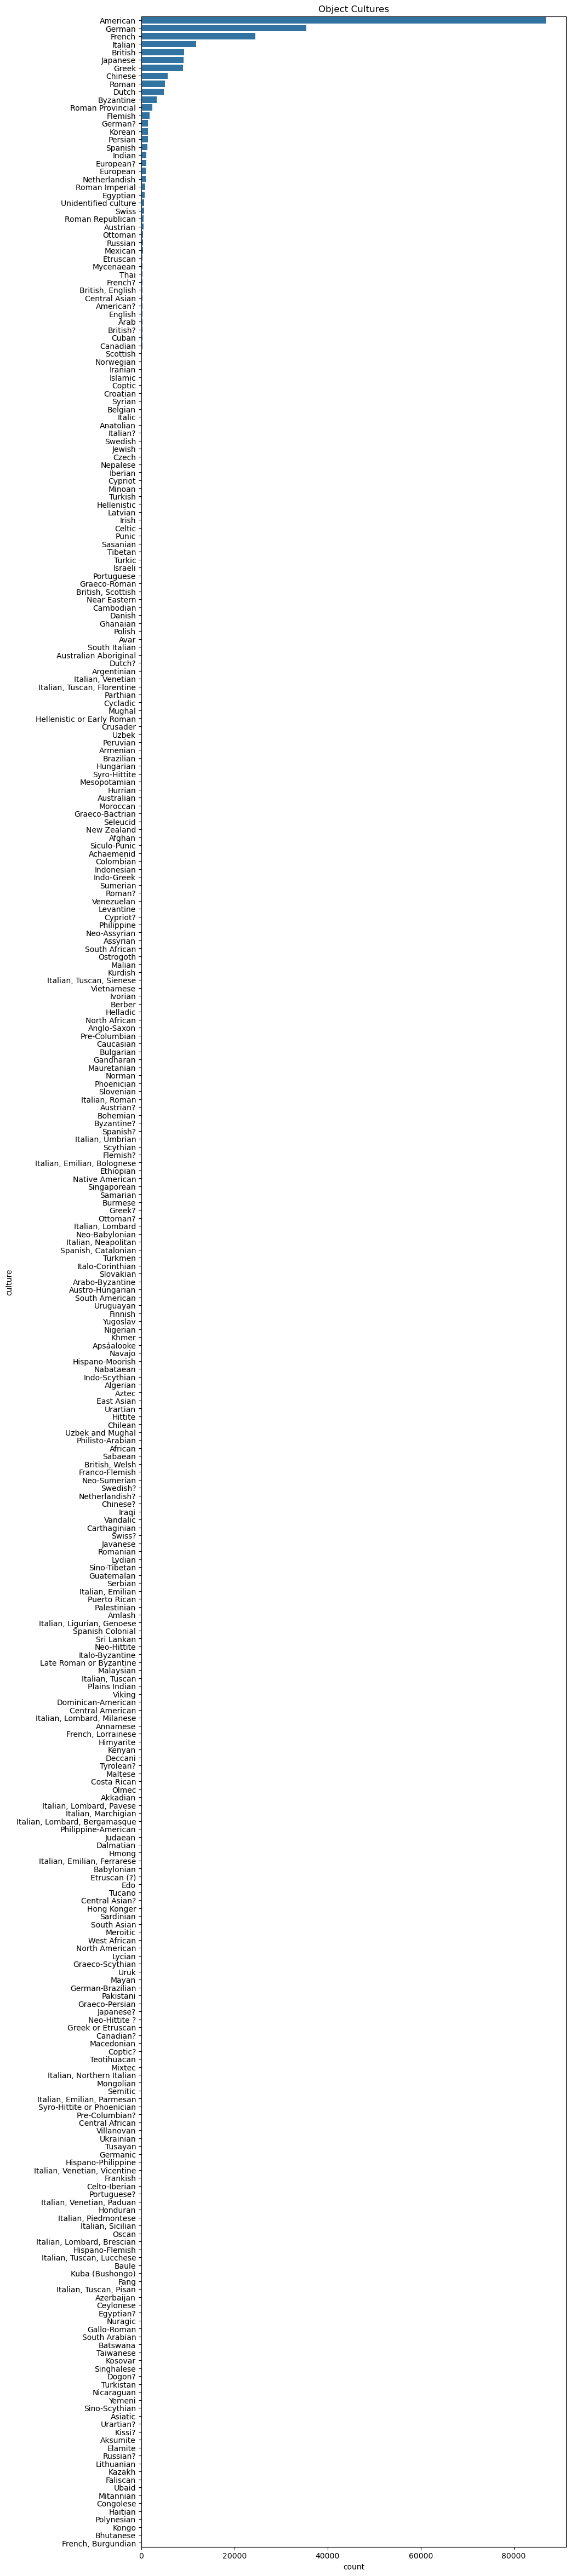

In [138]:
plt.figure(figsize=(10, 60))

culture_df = pd.DataFrame(df['culture'].value_counts())
sns.barplot(x='count', y='culture', data=culture_df, orient='h')
plt.title('Object Cultures')
# Show the plot
plt.show()

## Pulling records with offensive keywords.
Here we can do an inital scan for some offensive keywords. Examples are as follows:
* negro
* n****r
* savage
* indian
* oriental

### One group of records that immediately comes up is the **Social Museum Collection**. An important record of American history... derogatory keywords such as: Negroes, Jews, Indians, Cripples, Insane, Destitute occur with some regularity in the titles of these images with no disclaimer.

In [246]:
def show_record(title):
    row = df[df['title']== title]
    print(row['title'].values[0])
    image_path = row['primaryimageurl'].values[0]
    display(Image(url = image_path, width = 400))
def show_label(title):
    row = df[df['title']== title]
    print(row['labeltext'].values[0])

In [260]:
show_record("Races, Negroes: United States. Virginia. Hampton. Hampton Normal and Industrial School: Agencies Promoting Assimilation of the Negro: Development of Social Standards Among the Negroes. Hampton Normal and Agricultural Institute, Hampton, Va.: Geography - Local Industry.")

Races, Negroes: United States. Virginia. Hampton. Hampton Normal and Industrial School: Agencies Promoting Assimilation of the Negro: Development of Social Standards Among the Negroes. Hampton Normal and Agricultural Institute, Hampton, Va.: Geography - Local Industry.


## Examples of Records that contain derogatory terms

In [252]:
show_record('Negro Mounted Upon a Rearing Horse')
show_record("Negro in a Punt in a Landscape")
show_record("Negro Huts, near Wilminton, North Carolina")
show_record("Negro Page")
show_record("The Negro")
show_record('Lo, the Poor Indian')
show_record("The Franciscan and the Indian")
show_record("The Oriental Peasant and His Family")
show_record('Oriental Hunters Chasing Stags')
show_record('Oriental Hunters Killing Monkeys')
show_record("An Oriental Holding a Horse")
show_record("Oriental Dancer")
show_record("Mulatto and African Slaves")
show_record("Cripple with a Crutch and a Wooden Leg")

Negro Mounted Upon a Rearing Horse


Negro in a Punt in a Landscape


Negro Huts, near Wilminton, North Carolina


Negro Page


The Negro


Lo, the Poor Indian


The Franciscan and the Indian


The Oriental Peasant and His Family


Oriental Hunters Chasing Stags


Oriental Hunters Killing Monkeys


An Oriental Holding a Horse


Oriental Dancer


Mulatto and African Slaves


Cripple with a Crutch and a Wooden Leg


## Example of records where an attempt has been made to deal with derogatory terms

In [250]:
show_record('Two Women of Color, Dominica [French Mulatress of Dominica and a Negro Woman in their Proper Dress]')
show_record('Negro Soldier')
show_label('Negro Soldier')
show_record("Woman of Mixed Race")
show_label("Woman of Mixed Race")

Two Women of Color, Dominica [French Mulatress of Dominica and a Negro Woman in their Proper Dress]


Negro Soldier


Robert Smullyan Sloan was drafted into the army in 1943 and stationed in New York, where he illustrated educational materials for the armed services and produced posters for the U.S. Treasury’s war bond campaign. In this painstakingly detailed composition reminiscent of early Flemish painting, he portrays a U.S. Army private wearing a dress uniform with ribbons designating a Good Conduct Medal and participation in the European–African–Middle Eastern Campaign. The artist’s title, however, accords him only the designation of his race, using the language of that historical moment.
African Americans fought a two-front battle during World War II, facing enemies overseas and racism at home. The view out the window in Sloan’s work alludes to the distinguished soldier’s dreary prospects upon his return to the gritty urban environment of 125th Street in Harlem.
Woman of Mixed Race


A growing metropolis in the early 20th century, Berlin attracted diverse ethnic groups, particularly in the realms of art and theater. When he visited, Nolde avidly depicted scenes of modern urban life, including this portrait of a stage performer. The bright yellow circle surrounding the woman like a halo evokes a mirror, and the garish orange of the background reflects the gaslight backstage. Nolde’s title for this painting refers to the subject’s mixed-race heritage. In common use then, the term is now considered offensive for the way it devalues people based on their Black ancestry. The year Nolde painted this work, 1913, was the same year legislation was passed in Germany that made “German blood” the sole criterion for citizenship, as a way to exclude Germans of African descent — a law that was changed only in 2000. Represented here in vibrant colors, the unnamed subject lived and worked in Germany despite having no legal protection. Race is central to recent deconstructions of No

## We also looked at representation within the Art collections. We started by looking at the Gender of Artists.

In [325]:
df_list = []
data = df.people.values

for json_string in data:
    if pd.isna(json_string):
        df_list.append(None)
    else:
        try:
            # First try direct JSON parsing
            parsed_data = json.loads(json_string)
        except json.JSONDecodeError:
            try:
                # Try fixing common issues
                json_string_fixed = json_string.replace("'", '"')
                parsed_data = json.loads(json_string_fixed)
            except json.JSONDecodeError:
                try:
                    # Last resort - use ast.literal_eval for Python-like syntax
                    parsed_data = ast.literal_eval(json_string)
                except (ValueError, SyntaxError) as e:
                    print(f"Failed to parse: {json_string}")
                    print(f"Error: {str(e)}")
                    parsed_data = None
        
        if parsed_data is not None:
            try:
                normalized_df = pd.json_normalize(parsed_data)
                df_list.append(normalized_df)
            except Exception as e:
                print(f"Normalization failed for: {parsed_data}")
                print(f"Error: {str(e)}")
                df_list.append(None)
        else:
            df_list.append(None)

# Store results
df['people_df'] = df_list

# Show first 2 successful parses
#print([x for x in df_list[:2] if x is not None])

# For multiple entries per row (if people_df contains multiple rows):
df['genders'] = df['people_df'].apply(lambda x: list(x['gender']) if isinstance(x, pd.DataFrame) and 'gender' in x.columns else [])

#print(df['genders'].value_counts())
# Create a mask for lists containing 'female' AND NOT containing 'male'
fem_mask = (
    df['genders'].apply(lambda x: 'female' in x if isinstance(x, list) else False) & 
    ~df['genders'].apply(lambda x: 'male' in x if isinstance(x, list) else False)
)

masc_mask = (
    ~df['genders'].apply(lambda x: 'female' in x if isinstance(x, list) else False) & 
    df['genders'].apply(lambda x: 'male' in x if isinstance(x, list) else False)
)

unknown_mask = (
    ~df['genders'].apply(lambda x: 'female' in x if isinstance(x, list) else False) & 
    ~df['genders'].apply(lambda x: 'male' in x if isinstance(x, list) else False) 
   
)
# Filter the DataFrame
fem_only_df = df[fem_mask]
male_only_df = df[masc_mask]
unkn_df = df[unknown_mask]

# Create the new column
df['male/female'] = [
    'female' if fem else 
    'male' if masc else 
    'unknown' 
    for fem, masc in zip(fem_mask, masc_mask)
]

print(f"There are {len(fem_only_df)} objects attributed to females and {len(male_only_df)} \
objects attributed to males. There are {len(unkn_df)} objects which are attributed to \
people of unknown gender. This give us {round(len(fem_only_df)/len(df)*100, 2)} percent female, and \
{round(len(male_only_df)/len(df)*100, 2)} male, {round(len(unkn_df)/len(df)*100, 2)} percent   attributed items.")

There are 5437 objects attributed to females and 150173 objects attributed to males. There are 89312 objects which are attributed to people of unknown gender. This give us 2.21 percent female, and 61.12 male, 36.35 percent   attributed items.


## After some analysis, we see that of the approximately 250K items, 2.2% are female-attributed, 61.1% are male-attributed,and the remaining 36.4% are attributed to an unknown gender.
Likely, there are far more objects made by women than are attributed to them in the records. One area where this could be amended is within categories where objects would have been traditionally made by women: pottery, textiles, etc. 

## Below we plot artist's gender by year. Some observations are:
* Objects where a creation date is not known (here marked as year 0) are disproportionately attributed to men over being unknown or female.
* Most of the pre 1500 objects are of unknown gender aside from a cluster of male attributed items between years 0 and 600.
* There is an exponential increase in male attributed objects beginning around 1500 and peaking at 2000. 
* The only female attributed items exist in a cluster beginning around 1900 with a linear increase also peaking at the year 2000.

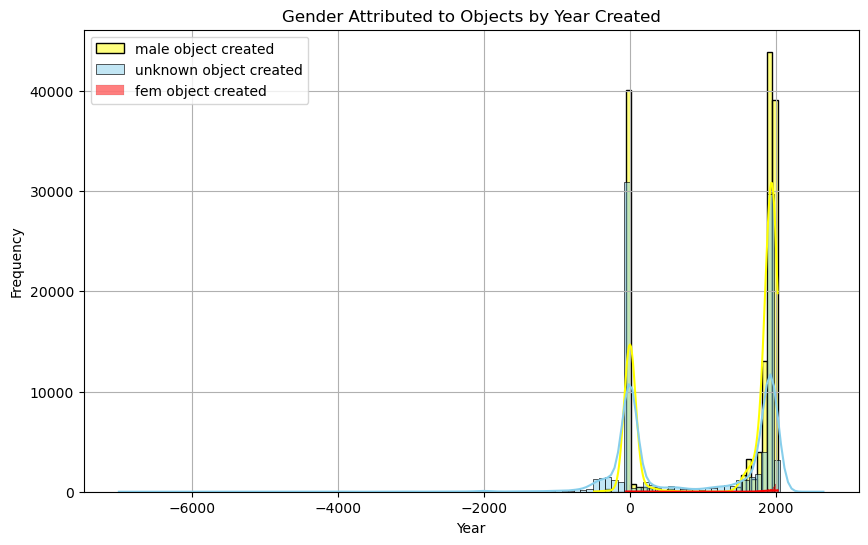

In [327]:
plt.figure(figsize=(10, 6))

sns.histplot(data=male_only_df, x='dateend', kde=True, color = 'yellow', label = "male object created")
sns.histplot(data=unkn_df, x='dateend', kde=True, color="skyblue", label = "unknown object created")
sns.histplot(data=fem_only_df, x='dateend', kde=True, color = 'red', label = "fem object created")
plt.title('Gender Attributed to Objects by Year Created')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

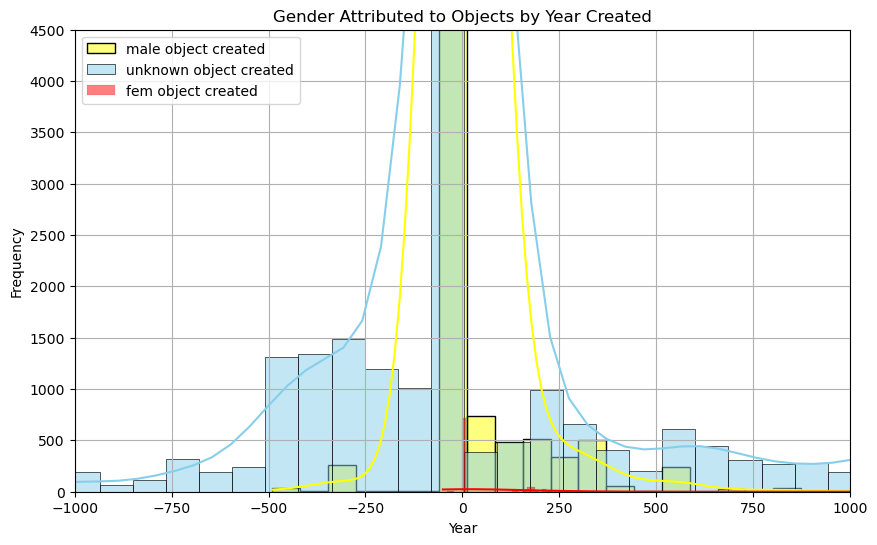

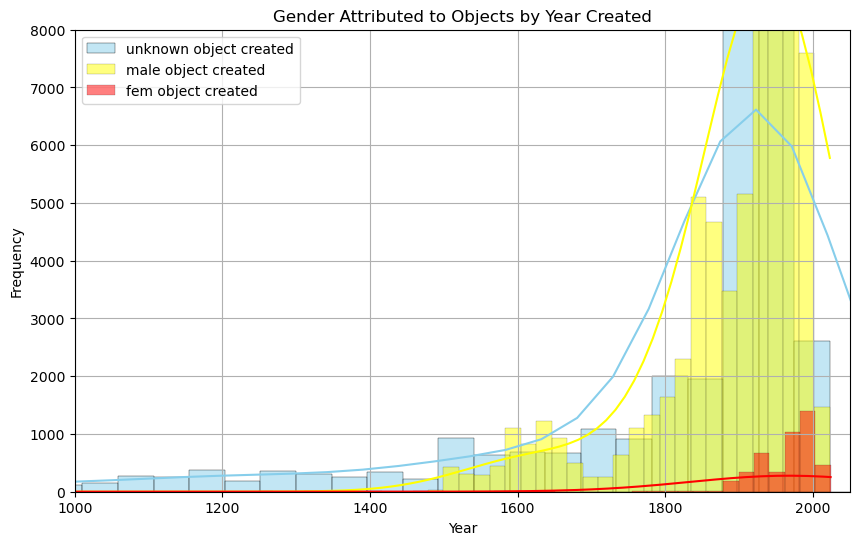

In [328]:
plt.figure(figsize=(10, 6))

sns.histplot(data=male_only_df, x='dateend', kde=True, color = 'yellow', label = "male object created")
sns.histplot(data=unkn_df, x='dateend', kde=True, color="skyblue", label = "unknown object created")
sns.histplot(data=fem_only_df, x='dateend', kde=True, color = 'red', label = "fem object created")
plt.title('Gender Attributed to Objects by Year Created')
plt.xlim(-1000, 1000)
plt.ylim(0, 4500)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

sns.histplot(data=unkn_df, x='dateend', kde=True, color="skyblue", label = "unknown object created", bins = 200)
sns.histplot(data=male_only_df, x='dateend', kde=True, color = 'yellow', label = "male object created", bins = 120)
sns.histplot(data=fem_only_df, x='dateend', kde=True, color = 'red', label = "fem object created", bins = 100)
plt.title('Gender Attributed to Objects by Year Created')
plt.xlim(1000, 2050)
plt.ylim(0, 8000)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Looking a little more closely at gender trends in the last 75 years we see:
### A dramatic Increase in proportion of female-attributed items
Beginning in the year 2010 the percentage of objects collected attributed to men have begun to decrease while the percentage attributed to women had increased. This shift is dramatic. Near 2018 the percentage of female attributed objects overtook the male reaching a ratio as high as 100:1 in the last few years.

In [330]:
recent_women = ((fem_only_df['dateend']<= 1975) & (fem_only_df['dateend']>= 1950)).sum()
recent_men = ((male_only_df['dateend']<= 1975) & (male_only_df['dateend']>= 1950)).sum()
recent_unknown = ((unkn_df['dateend']<= 1975) & (unkn_df['dateend']>= 1950)).sum()
total = recent_women + recent_men + recent_unknown
print(f"From objects made between 1950-1975 {round(recent_women/total *100,2)} percent were attributed to women while \
{round(recent_men/total *100,2)} percent were attributed to men and {round(recent_unknown/total *100,2)} percent were unknown.")

recent_women = ((fem_only_df['dateend']<= 2000) & (fem_only_df['dateend']>= 1975)).sum()
recent_men = ((male_only_df['dateend']<= 2000) & (male_only_df['dateend']>= 1975)).sum()
recent_unknown = ((unkn_df['dateend']<= 2000) & (unkn_df['dateend']>= 1975)).sum()
total = recent_women + recent_men + recent_unknown
print(f"From objects made between 1975-2000 {round(recent_women/total *100,2)} percent were attributed to women while \
{round(recent_men/total *100,2)} percent were attributed to men and {round(recent_unknown/total *100,2)} percent were unknown.")

recent_women = (fem_only_df['dateend']>= 2000).sum()
recent_men = (male_only_df['dateend']>= 2000).sum()
recent_unknown = (unkn_df['dateend']>= 2000).sum()
total = recent_women + recent_men + recent_unknown
print(f"From objects made between 2000-2025 {round(recent_women/total *100,2)} percent were attributed to women while \
{round(recent_men/total *100,2)} percent were attributed to men and {round(recent_unknown/total *100,2)} percent were unknown.")

From objects made between 1950-1975 2.09 percent were attributed to women while 76.79 percent were attributed to men and 21.11 percent were unknown.
From objects made between 1975-2000 11.14 percent were attributed to women while 76.79 percent were attributed to men and 12.08 percent were unknown.
From objects made between 2000-2025 19.26 percent were attributed to women while 58.53 percent were attributed to men and 22.2 percent were unknown.


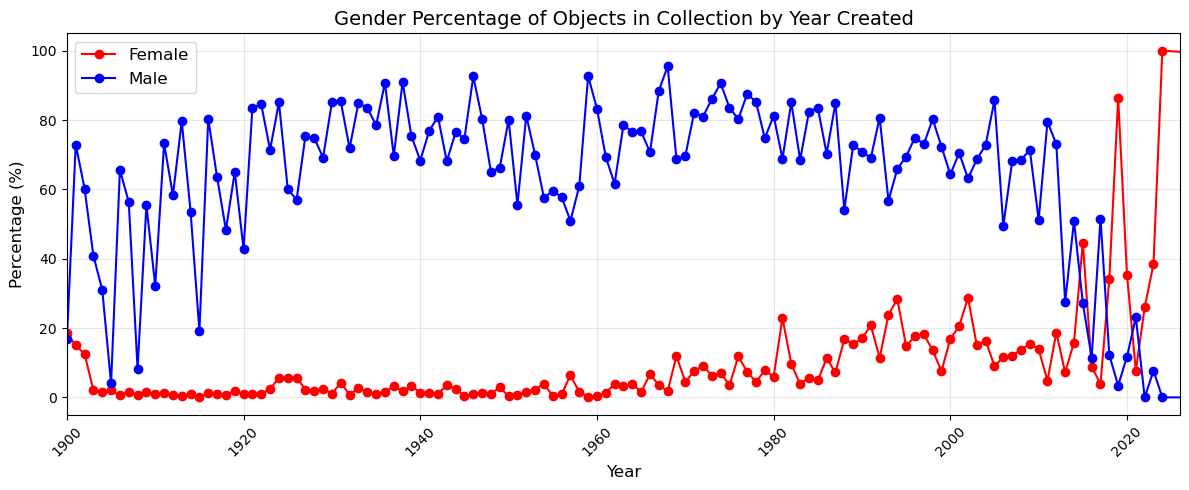

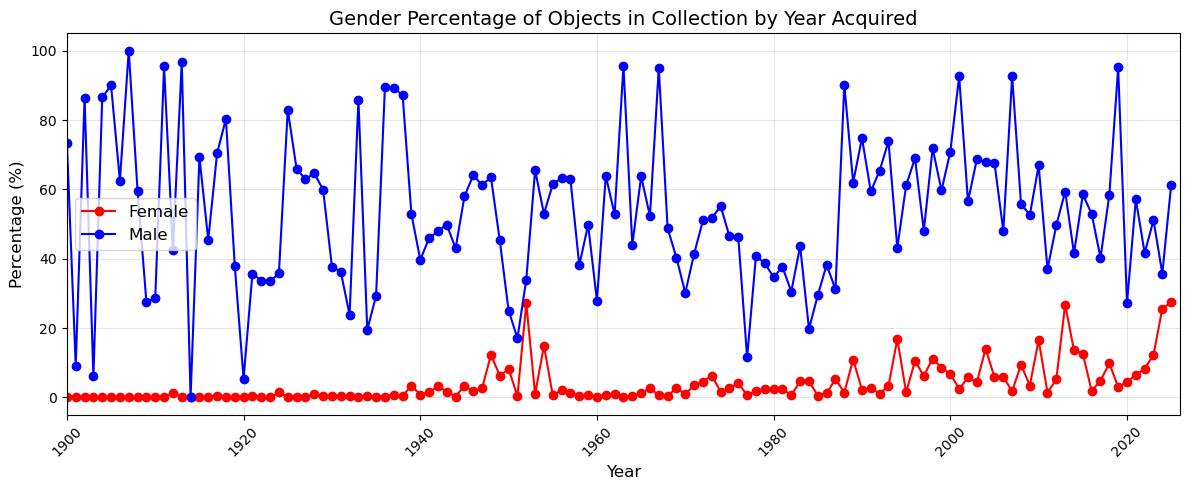

In [331]:
gender_by_year = (
    df.groupby(['dateend', 'male/female'])
    .size()
    .unstack(fill_value=0)
)
gender_by_year = gender_by_year.div(gender_by_year.sum(axis=1), axis=0) * 100

# 3. Plot the results
plt.figure(figsize=(12, 5))

# Plot female percentage
plt.plot(gender_by_year.index, gender_by_year['female'], 
         label='Female', color='red', marker='o')

# Plot male percentage
plt.plot(gender_by_year.index, gender_by_year['male'], 
         label='Male', color='blue', marker='o')

# Formatting
plt.title('Gender Percentage of Objects in Collection by Year Created', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels if many years
if len(gender_by_year) > 10:
    plt.xticks(rotation=45)
    plt.xlim(1900, 2026)

plt.tight_layout()
plt.show()

gender_by_year = (
    df.groupby(['accessionyear', 'male/female'])
    .size()
    .unstack(fill_value=0)
)
gender_by_year = gender_by_year.div(gender_by_year.sum(axis=1), axis=0) * 100

# 3. Plot the results
plt.figure(figsize=(12, 5))

# Plot female percentage
plt.plot(gender_by_year.index, gender_by_year['female'], 
         label='Female', color='red', marker='o')

# Plot male percentage
plt.plot(gender_by_year.index, gender_by_year['male'], 
         label='Male', color='blue', marker='o')

# Formatting
plt.title('Gender Percentage of Objects in Collection by Year Acquired', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels if many years
if len(gender_by_year) > 10:
    plt.xticks(rotation=45)
    plt.xlim(1900, 2026)

plt.tight_layout()
plt.show()

## Why was there a sudden drop in the percent of number of artworks made by men in the 2020s?
Many recent artwork 'people' fields contain an unknown gender

In [343]:
df[df['dateend']>= 2020][['dateend', 'people_df', 'male/female']]

dateend  \
87459      2650   
169670     2020   
169671     2020   
169672     2020   
169824     2020   
170573     2020   
170574     2020   
170575     2020   
170576     2020   
170736     2021   
170838     2020   
171157     2021   
171747     2020   
171748     2021   
171784     2021   
172657     2021   
172658     2021   
172716     2020   
172840     2021   
172841     2021   
172842     2021   
172843     2021   
172844     2021   
172845     2021   
172846     2021   
173444     2021   
173935     2021   
174006     2020   
174008     2020   
175042     2021   
175114     2022   
175119     2020   
175120     2021   
175471     2023   
175475     2021   
175479     2021   
175495     2022   
175543     2020   
175641     2020   
175643     2021   
175644     2022   
175739     2022   
175749     2021   
175750     2021   
175751     2021   
175752     2021   
175753     2021   
175763     2021   
175764     2021   
175765     2021   
175766     2021   
175767     2021   
175768     2021   
175779     2023   
175780     2023   
175781     2023   
175863     2022   
175889     2023   
175890     2023   
175986     2023   
175987     2023   
175994     2021   
175995     2023   
175997     2023   
176011     2022   
176041     2023   
176053     2022   
176054     2022   
176055     2023   
176056     2022   
176057     2022   
176058     2023   
176059     2023   
176086     2021   
176101     2022   
176102     2022   
176103     2022   
176104     2022   
176105     2022   
176106     2022   
176107     2023   
176108     2023   
176109     2023   
176110     2023   
176111     2023   
176112     2023   
176113     2023   
176115     2021   
176116     2021   
176117     2022   
176118     2022   
176119     2022   
176122     2021   
176123     2021   
176156     2020   
176157     2022   
176158     2021   
176159     2023   
176179     2023   
176297     2022   
176298     2022   
176299     2022   
176308     2022   
176396     2023   
176397     2022   
176430     2023   
176895     2023   
176925     2024   
176926     2024   
176927     2022   
176928     2022   
176929     2024   
176930     2024   
176931     2024   
176932     2021   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    people_df  \
87459                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    None   
169670                                                                                                                               role         birthplace  gender displaydate prefix   culture  \
0  Artist  Ilé-If?`, Nigeria  female   born 1985   None  American   

          displayname            alphasort                name  personid  \
0  Toyin Ojih Odutola  Ojih Odutola, Toyin  Toyin Ojih Odutola     68282   

  deathplace  displayorder  
0       None             1     
169671                                                                                                                               role         birthplace  gender displaydate prefix   culture  \
0  Artist  Ilé-If?`, Nigeria  female   born 1985   None  American   

          displayname            alphasort                name  personid  \
0  Toyin Ojih Odu

## Let's do the same alaysis but with objects that are eventually exhibited. 
### We see the same shift here but much more gradual.

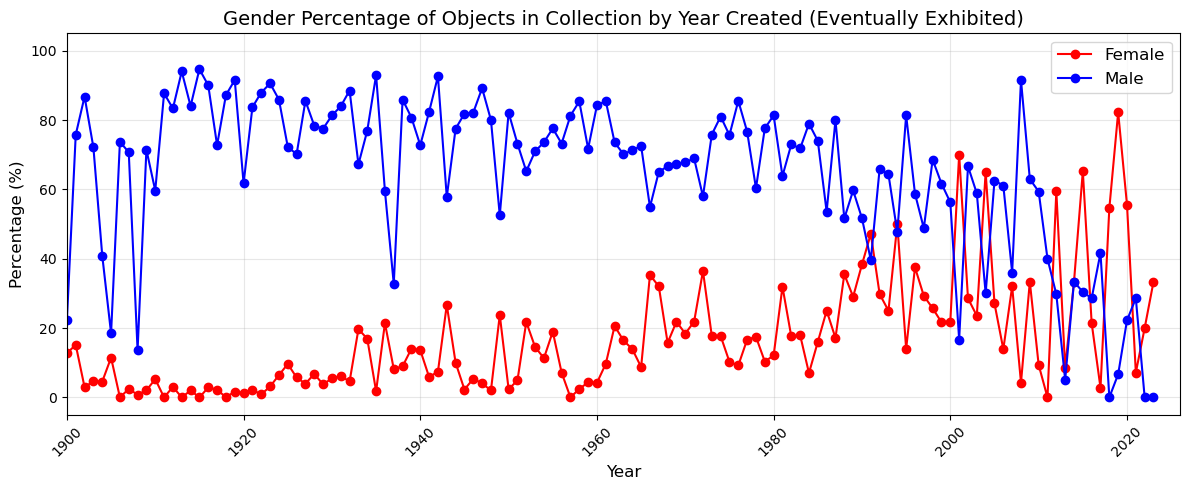

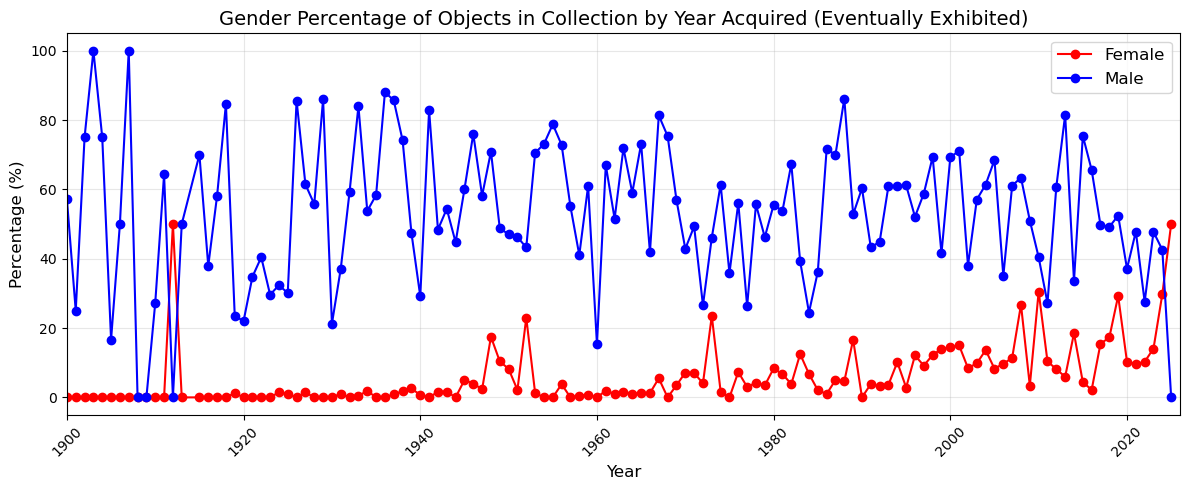

In [340]:
exhibited_df = df[df['exhibitioncount']>0]
gender_by_year = (
    exhibited_df.groupby(['dateend', 'male/female'])
    .size()
    .unstack(fill_value=0)
)
gender_by_year = gender_by_year.div(gender_by_year.sum(axis=1), axis=0) * 100

# 3. Plot the results
plt.figure(figsize=(12, 5))

# Plot female percentage
plt.plot(gender_by_year.index, gender_by_year['female'], 
         label='Female', color='red', marker='o')

# Plot male percentage
plt.plot(gender_by_year.index, gender_by_year['male'], 
         label='Male', color='blue', marker='o')

# Formatting
plt.title('Gender Percentage of Objects in Collection by Year Created (Eventually Exhibited)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels if many years
if len(gender_by_year) > 10:
    plt.xticks(rotation=45)
    plt.xlim(1900, 2026)

plt.tight_layout()
plt.show()

exhibited_df = df[df['exhibitioncount']>0]
gender_by_year = (
    exhibited_df.groupby(['accessionyear', 'male/female'])
    .size()
    .unstack(fill_value=0)
)
gender_by_year = gender_by_year.div(gender_by_year.sum(axis=1), axis=0) * 100

# 3. Plot the results
plt.figure(figsize=(12, 5))

# Plot female percentage
plt.plot(gender_by_year.index, gender_by_year['female'], 
         label='Female', color='red', marker='o')

# Plot male percentage
plt.plot(gender_by_year.index, gender_by_year['male'], 
         label='Male', color='blue', marker='o')

# Formatting
plt.title('Gender Percentage of Objects in Collection by Year Acquired (Eventually Exhibited)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels if many years
if len(gender_by_year) > 10:
    plt.xticks(rotation=45)
    plt.xlim(1900, 2026)

plt.tight_layout()
plt.show()

## We can look at trends in the gender of artists exhibited each year

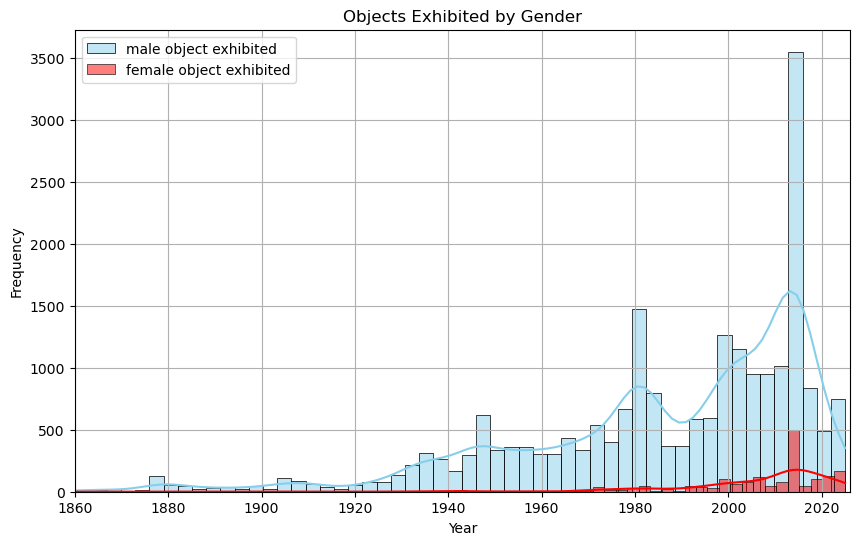

In [357]:

df_list = []
data = exhibited_df.exhibitions.values

for json_string in data:
    if pd.isna(json_string):
        df_list.append(None)
    else:
        try:
            # First try direct JSON parsing
            parsed_data = json.loads(json_string)
        except json.JSONDecodeError:
            try:
                # Try fixing common issues
                json_string_fixed = json_string.replace("'", '"')
                parsed_data = json.loads(json_string_fixed)
            except json.JSONDecodeError:
                try:
                    # Last resort - use ast.literal_eval for Python-like syntax
                    parsed_data = ast.literal_eval(json_string)
                except (ValueError, SyntaxError) as e:
                    print(f"Failed to parse: {json_string}")
                    print(f"Error: {str(e)}")
                    parsed_data = None
        
        if parsed_data is not None:
            try:
                normalized_df = pd.json_normalize(parsed_data)
                df_list.append(normalized_df)
            except Exception as e:
                print(f"Normalization failed for: {parsed_data}")
                print(f"Error: {str(e)}")
                df_list.append(None)
        else:
            df_list.append(None)

# Store results
exhibited_df['exhibitions_df'] = df_list

exhibited_df['exhibitions_df'][:3]
exhibited_df.loc[:,'exhibitions_date'] = exhibited_df.exhibitions_df.apply(lambda x: list(x['begindate']) if isinstance(x, pd.DataFrame) and 'begindate' in x.columns else [])

m_exhibited = exhibited_df[exhibited_df['male/female'] == 'male']
f_exhibited = exhibited_df[exhibited_df['male/female'] == 'female']
u_exhibited = exhibited_df[exhibited_df['male/female'] == 'unknown']
m_list = []
f_list = []
u_list = []
from itertools import chain

m_list.append([i[:] for i in m_exhibited['exhibitions_date'].values])
m_list_flattened = list(chain.from_iterable(chain.from_iterable(m_list)))
m_list_flattened = pd.to_datetime(m_list_flattened, format='ISO8601').year.tolist()
f_list.append(i for i in f_exhibited['exhibitions_date'].values[:])
f_list_flattened = list(chain.from_iterable(chain.from_iterable(f_list)))
f_list_flattened = pd.to_datetime(f_list_flattened, format='ISO8601').year.tolist()
u_list.append(i for i in u_exhibited['exhibitions_date'].values[:])
u_list_flattened = list(chain.from_iterable(chain.from_iterable(u_list)))
u_list_flattened = pd.to_datetime(u_list_flattened, format='ISO8601').year.tolist()




plt.figure(figsize=(10, 6))


sns.histplot(m_list_flattened , kde=True, color = 'skyblue', label = "male object exhibited")
sns.histplot(f_list_flattened , kde=True, color="red", label = "female object exhibited")
#sns.histplot(u_list_flattened , kde=True, color="yellow", label = "unknown gender object exhibited")


plt.title('Objects Exhibited by Gender')
plt.xlim(1860, 2026)
#plt.ylim(0, 4500)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## We also looked at trends in Exhibitions and Acquisitions 

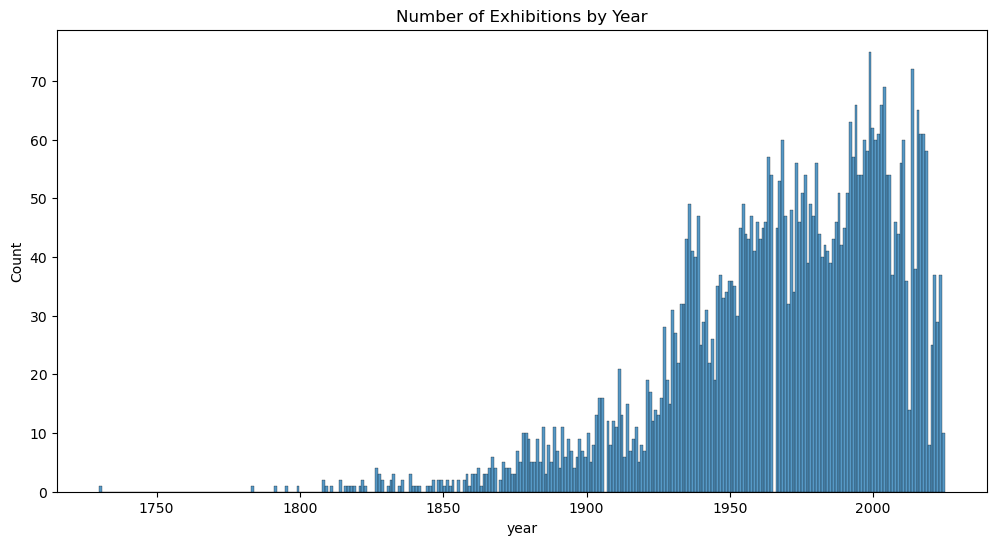

In [373]:
e_df = pd.read_csv('exhibitions.csv')
e_df['begindate'] = pd.to_datetime(e_df['begindate'], errors = 'coerce')
e_df['year'] = e_df['begindate'].dt.year

plt.figure(figsize=(12, 6))
plt.title("Number of Exhibitions by Year")
sns.histplot(e_df['year'], bins = 300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

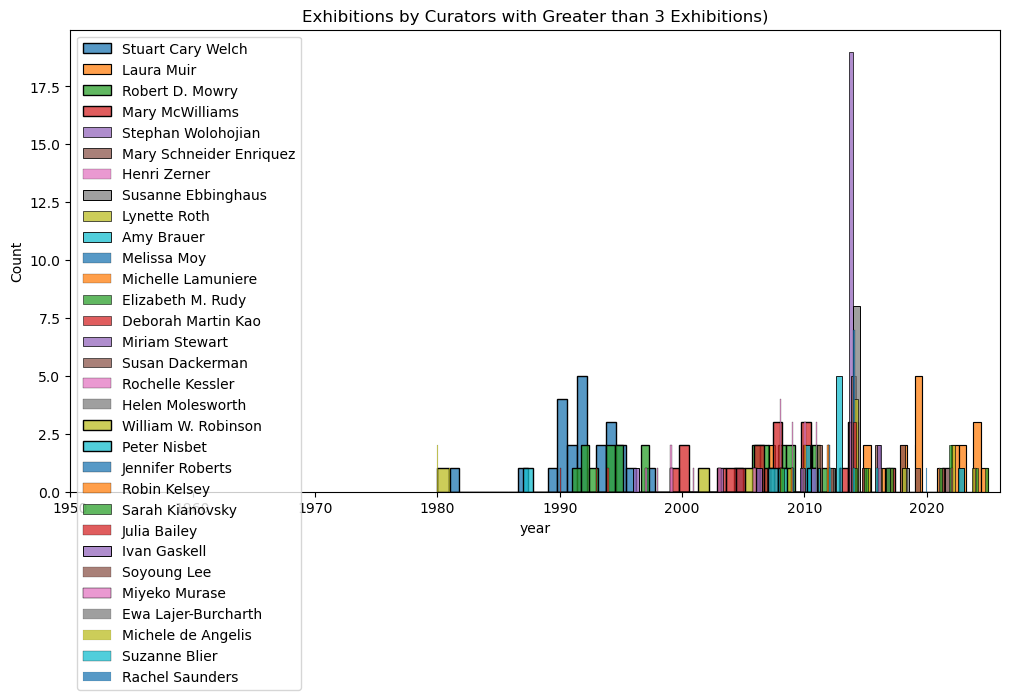

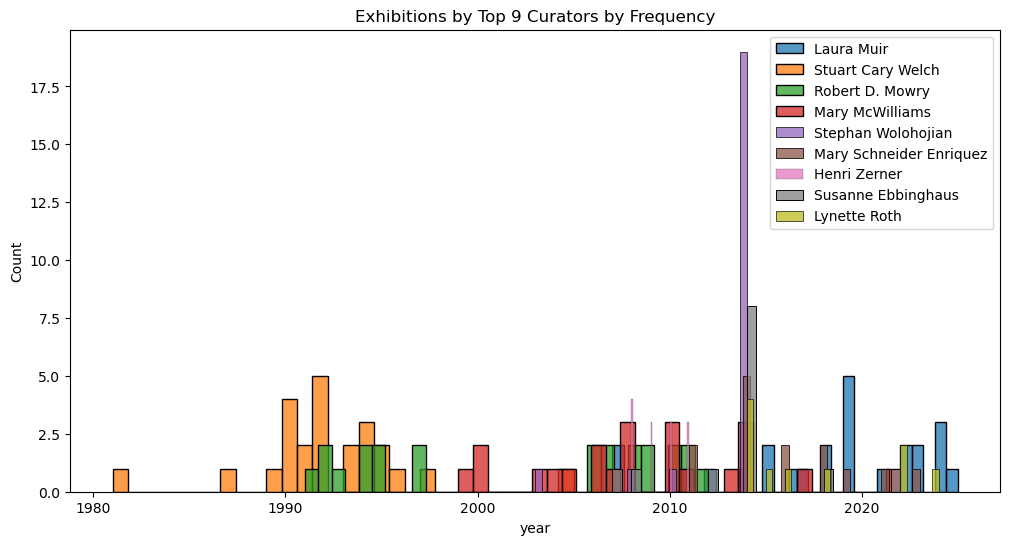

In [397]:
def extract_from_json(people_entry):
    try:
        if isinstance(people_entry, str):
            data = ast.literal_eval(people_entry)
            return next((item['name'] for item in data if 'name' in item), None)
        elif isinstance(people_entry, list):
            return next((item['name'] for item in people_entry if 'name' in item), None)
    except:
        return None

e_df['name'] = e_df['people'].apply(extract_from_json)

name_list = e_df['name'].value_counts()[(e_df['name'].value_counts()>=3)].index
list(name_list)
plt.figure(figsize=(12, 6))
for name in name_list:
    if name != None:
        j = e_df[e_df['name'] == name]['year']
        sns.histplot(j, label= name, bins = 30)
plt.xlim(1950, 2026)
plt.title("Exhibitions by Curators with Greater than 3 Exhibitions)")
plt.legend()
plt.show

Laura = e_df[e_df['name'] == 'Laura Muir']['year']
Stuart = e_df[e_df['name'] == 'Stuart Cary Welch']['year']
Robert = e_df[e_df['name'] == 'Robert D. Mowry']['year']
Mary = e_df[e_df['name'] == 'Mary McWilliams']['year']
Stephan = e_df[e_df['name'] == 'Stephan Wolohojian']['year']
Mary2 = e_df[e_df['name'] == 'Mary Schneider Enriquez']['year']
Henri = e_df[e_df['name'] == 'Henri Zerner']['year']
Susan = e_df[e_df['name'] == 'Susanne Ebbinghaus']['year']
Lyne = e_df[e_df['name'] == 'Lynette Roth']['year']
Amy = e_df[e_df['name'] == 'Amy Brauer  ']['year']
Mary2 = e_df[e_df['name'] == 'Mary Schneider Enriquez']['year']
Henri = e_df[e_df['name'] == 'Henri Zerner']['year']
Susan = e_df[e_df['name'] == 'Susanne Ebbinghaus']['year']
Lyne = e_df[e_df['name'] == 'Lynette Roth']['year']
Amy = e_df[e_df['name'] == 'Amy Brauer  ']['year']


plt.figure(figsize=(12, 6))
sns.histplot(Laura, label= "Laura Muir", bins = 30)
sns.histplot(Stuart, label= 'Stuart Cary Welch', bins = 30)
sns.histplot(Robert, label= 'Robert D. Mowry', bins = 30)
sns.histplot(Mary, label= 'Mary McWilliams', bins = 30)
sns.histplot(Stephan, label= 'Stephan Wolohojian', bins = 30)
sns.histplot(Mary2, label= 'Mary Schneider Enriquez', bins = 30)
sns.histplot(Henri, label= 'Henri Zerner', bins = 30)
sns.histplot(Susan, label= 'Susanne Ebbinghaus', bins = 30)
sns.histplot(Lyne, label= 'Lynette Roth', bins = 30)
sns.histplot(Amy, label= 'Amy Brauer  ', bins = 30)
#sns.histplot(Henri, label= 'Henri Zerner', bins = 30)
#sns.histplot(Susan, label= 'Susanne Ebbinghaus', bins = 30)
#sns.histplot(Lyne, label= 'Lynette Roth', bins = 30)
#sns.histplot(Amy, label= 'Amy Brauer  ', bins = 30)
plt.title("Exhibitions by Top 9 Curators by Frequency")
plt.legend()
plt.show

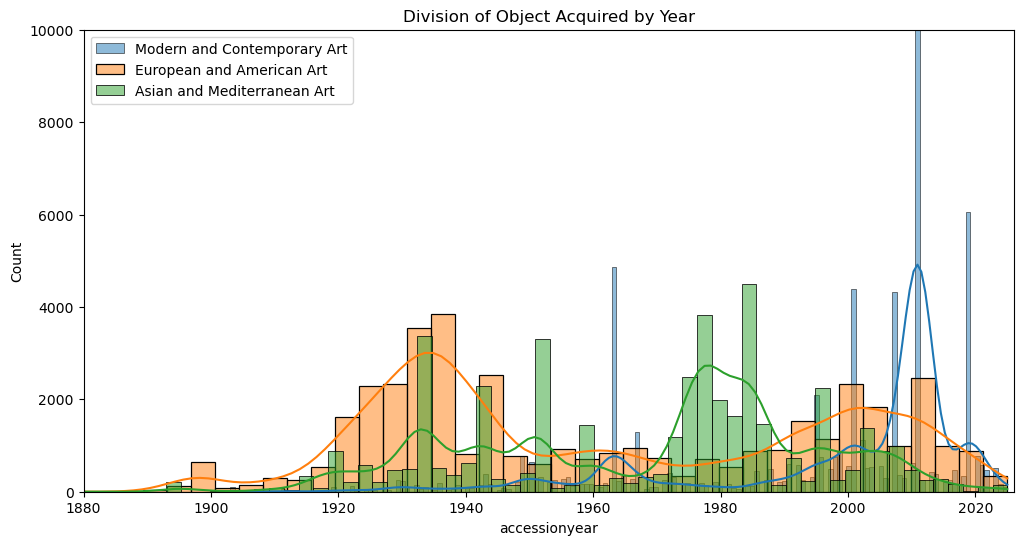

In [363]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['division']== 'Modern and Contemporary Art'], x='accessionyear', kde=True, label = 'Modern and Contemporary Art')
sns.histplot(data=df[df['division']== 'European and American Art'], x='accessionyear', kde=True, label = 'European and American Art')
sns.histplot(data=df[df['division']== 'Asian and Mediterranean Art'], x='accessionyear', kde=True, label = 'Asian and Mediterranean Art')
plt.title("Division of Object Acquired by Year")
plt.ylim(0,10000)
plt.xlim(1880,2026)
plt.legend()
plt.show()

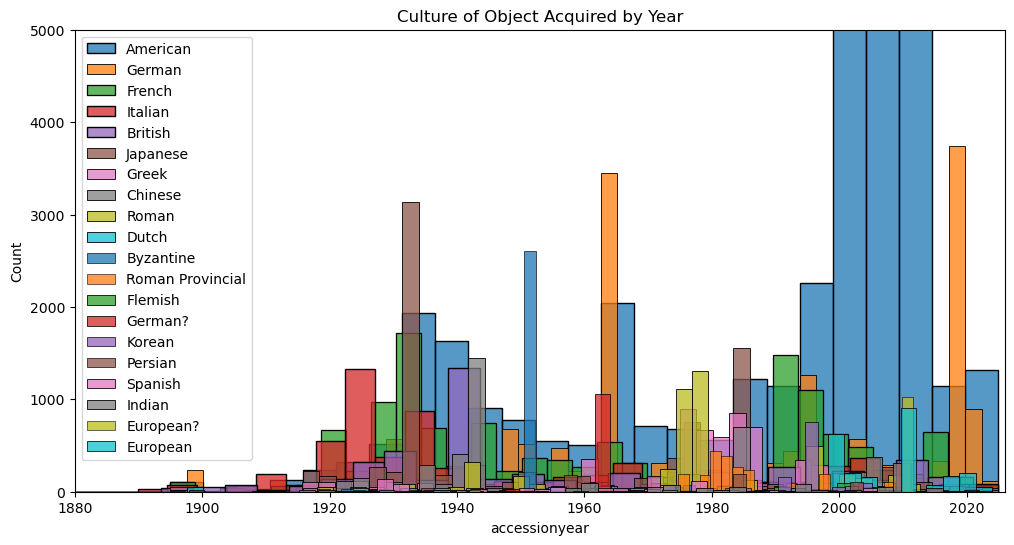

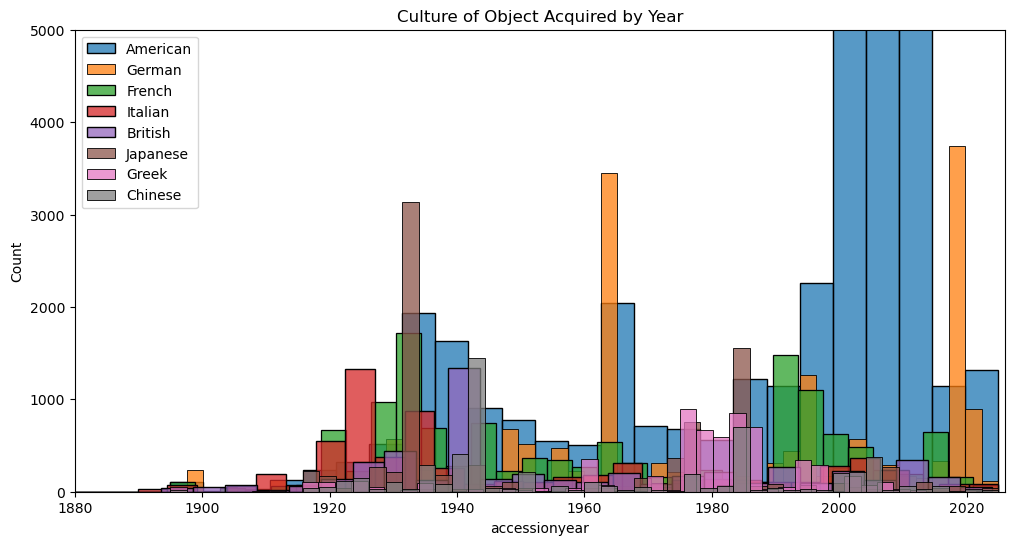

In [369]:
top_20 = df['culture'].value_counts()[:20].index
plt.figure(figsize=(12, 6))
for cult in top_20: 
    sns.histplot(data=df[df['culture']== cult], x='accessionyear', label = cult, bins = 50)
plt.title("Culture of Object Acquired by Year")
plt.ylim(0,5000)
plt.xlim(1880,2026)
plt.legend()
plt.show()

top_8 = df['culture'].value_counts()[:8].index
plt.figure(figsize=(12, 6))
for cult in top_8: 
    sns.histplot(data=df[df['culture']== cult], x='accessionyear', label = cult, bins= 50)
plt.title("Culture of Object Acquired by Year")
plt.ylim(0,5000)
plt.xlim(1880,2026)
plt.legend()
plt.show()

In [221]:
def search_string_in_dataframe(df, search_string, case_sensitive=False):
    """
    Searches for a string in any field of a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to search within.
        search_string (str): The string to search for.
        case_sensitive (bool, optional): Whether the search is case-sensitive. Defaults to False.

    Returns:
         pd.DataFrame: A DataFrame containing rows where the string was found, or an empty DataFrame if not found.
    """
    mask = np.column_stack([df[col].astype(str).str.contains(search_string, case=case_sensitive, na=False).values for col in df])
    return df[mask.any(axis=1)]

In [409]:
l = search_string_in_dataframe( df, "Seven little Indians" )
image_path =l['url'].values[0]
display(HTML(url = image_path))

i = search_string_in_dataframe( df, "Indian Chiefs Who" )
image_path =i['url'].values[0]
display(HTML(url = image_path))

f = search_string_in_dataframe( df, "Fair Sex" )
image_path =f['url'].values[0]
display(HTML(url = image_path))

n = search_string_in_dataframe( df, "Free Nig" )
image_path =n['url'].values[0]
display(HTML(url = image_path))

## Recommendations:

* Create a warning or forward-facing text that acknowledges the significance of preserving historically derogatory terms while simultaneously promoting a new antiracist perspective.

* Attempt to gather and showcase underrepresented groups, including women. Achieving this goal requires a means to represent the unique characteristics, cultures, and identities of these communities so that improvements are quantifiable.

* Introduce an identity subfield within the ‘person’ section of each record. This field will encompass the identities that the artist or object-related person themselves identifies with. Examples include Black, Asian American, Disabled, Queer, Minority, Neurodivergent, Swiss Indian, etc. This field can also be utilized to create more precise levels of cultural description, such as Chalchiteco instead of Guatemalan.
